# viz

> Fill in a module description here

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
#| default_exp viz

In [ ]:
#| export
from graphviz import Digraph
from neev.engine import *

Requires `graphviz`. Install it using `mamba install -c anaconda python-graphviz pydot`

In [ ]:
#| hide
!pwd

/Users/kaushik.sinha/ws_p/neev/nbs


In [ ]:
#| export
def trace(root:Value):# root node of the computation graph
    '''builds a set of all nodes and edges in a graph'''
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

In [ ]:
#| export
def draw_dot(root:Value,# root node of the computation graph 
             format='svg',# png | svg | ... 
             rankdir='LR'):# TB (top to bottom graph) | LR (left to right)
    """
    visualize the graph using dot
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        # for any value in the graph, create a rectangular (`record`) node for it         
        dot.node(name=str(id(n)), label = f'{n.label} | data {n.data:.4f} | grad {n.grad:.4f}', shape='record')
        if n._op:
            # if this value is the result of some operation create an op node for it
            dot.node(name=str(id(n)) + n._op, label=n._op)
            # and connect this node to it
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

In [ ]:
a,b,c = Value(2.,label='a'),Value(-3.,label='b'),Value(10.,label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.); f.label='f'
L = d*f; L.label = 'L'
L

Value(data=-8.0)

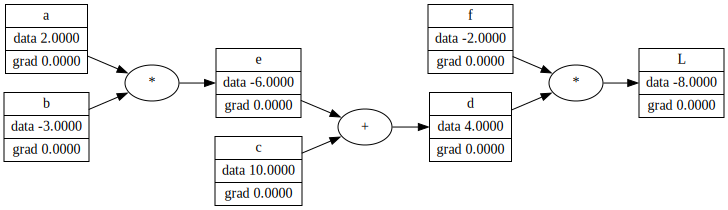

In [ ]:
draw_dot(L)

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()